In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')


# Perth basin.


In [2]:
import os

# Importing GemPy
import gempy as gp

# Importing auxiliary libraries
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
geo_model = gp.create_model('Perth_Basin')

In [4]:
gp.init_data(geo_model,
             extent=[337000, 400000, 6640000, 6710000, -18000, 1000],
             resolution=[100, 100, 100],
             path_i=data_path + "/data/input_data/Perth_basin/Paper_GU2F_sc_faults_topo_Points.csv",
             path_o=data_path + "/data/input_data/Perth_basin/Paper_GU2F_sc_faults_topo_Foliations.csv")

Active grids: ['regular']


Perth_Basin  2021-09-20 17:37

In [5]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Lesueur,Default series,1,#015482,1
1,Permian,Default series,2,#9f0052,2
2,Woodada_Kockatea,Default series,3,#ffbe00,3
3,Yarragadee,Default series,4,#728f02,4
4,Eneabba,Default series,5,#443988,5
5,Cattamarra,Default series,6,#ff3f20,6
6,Cadda,Default series,7,#5DA629,7
7,Cretaceous,Default series,8,#4878d0,8
8,Darling,Default series,9,#ee854a,9
9,Urella_North,Default series,10,#6acc64,10


In [6]:
del_surfaces = ['Cadda' ,'Woodada_Kockatea', 'Cattamarra']

In [7]:
geo_model.delete_surfaces(del_surfaces, remove_data=True)

,surface,series,order_surfaces,color,id
0,Lesueur,Default series,1,#015482,1
1,Permian,Default series,2,#9f0052,2
3,Yarragadee,Default series,3,#728f02,3
4,Eneabba,Default series,4,#443988,4
7,Cretaceous,Default series,5,#4878d0,5
8,Darling,Default series,6,#ee854a,6
9,Urella_North,Default series,7,#6acc64,7
10,Eneabba_South,Default series,8,#d65f5f,8
11,Coomallo,Default series,9,#956cb4,9
12,Hypo_fault_E,Default series,10,#8c613c,10


%debug



In [8]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
Basement,2,Erosion,False,False,False


In [9]:
gp.map_stack_to_surfaces(geo_model,
                          {"fault_Abrolhos_Transfer": ["Abrolhos_Transfer"],
                           "fault_Coomallo": ["Coomallo"],
                           "fault_Eneabba_South": ["Eneabba_South"],
                           "fault_Hypo_fault_W": ["Hypo_fault_W"],
                           "fault_Hypo_fault_E": ["Hypo_fault_E"],
                           "fault_Urella_North": ["Urella_North"],
                           "fault_Urella_South": ["Urella_South"],
                           "fault_Darling": ["Darling"],
                           "Sedimentary_Series": ['Cretaceous',
                                                  'Yarragadee',
                                                  'Eneabba',
                                                  'Lesueur',
                                                  'Permian','Cadda', 'Woodada_Kockatea', 'Cattamarra']
                           })

,surface,series,order_surfaces,color,id
15,Abrolhos_Transfer,fault_Abrolhos_Transfer,1,#d5bb67,1
11,Coomallo,fault_Coomallo,1,#956cb4,2
10,Eneabba_South,fault_Eneabba_South,1,#d65f5f,3
13,Hypo_fault_W,fault_Hypo_fault_W,1,#dc7ec0,4
12,Hypo_fault_E,fault_Hypo_fault_E,1,#8c613c,5
9,Urella_North,fault_Urella_North,1,#6acc64,6
14,Urella_South,fault_Urella_South,1,#797979,7
8,Darling,fault_Darling,1,#ee854a,8
0,Lesueur,Sedimentary_Series,1,#015482,9
1,Permian,Sedimentary_Series,2,#9f0052,10


In [10]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
fault_Abrolhos_Transfer,1,Erosion,True,False,False
fault_Coomallo,2,Erosion,True,False,False
fault_Eneabba_South,3,Erosion,True,False,False
fault_Hypo_fault_W,4,Erosion,True,False,False
fault_Hypo_fault_E,5,Erosion,True,False,False
fault_Urella_North,6,Erosion,True,False,False
fault_Urella_South,7,Erosion,True,False,False
fault_Darling,8,Erosion,True,False,False
Sedimentary_Series,9,Erosion,True,False,False
Basement,10,Erosion,False,False,False


In [11]:
order_series = ["fault_Urella_North",
                "fault_Darling",
                "fault_Hypo_fault_W",
                "fault_Urella_South",
                "fault_Abrolhos_Transfer",
                "fault_Coomallo",
                "fault_Hypo_fault_E",
                "fault_Eneabba_South",  
                "Sedimentary_Series", 'Basement']

geo_model.reorder_series(order_series)

,order_series,BottomRelation,isActive,isFault,isFinite
fault_Urella_North,1,Erosion,True,False,False
fault_Darling,2,Erosion,True,False,False
fault_Hypo_fault_W,3,Erosion,True,False,False
fault_Urella_South,4,Erosion,True,False,False
fault_Abrolhos_Transfer,5,Erosion,True,False,False
fault_Coomallo,6,Erosion,True,False,False
fault_Hypo_fault_E,7,Erosion,True,False,False
fault_Eneabba_South,8,Erosion,True,False,False
Sedimentary_Series,9,Erosion,True,False,False
Basement,10,Erosion,False,False,False


Drop input data from the deleted series:




In [12]:
geo_model.surface_points.df.dropna(inplace=True)
geo_model.orientations.df.dropna(inplace=True)

## Select which series are faults




In [13]:
geo_model.faults

,order_series,BottomRelation,isActive,isFault,isFinite
fault_Urella_North,1,Erosion,True,False,False
fault_Darling,2,Erosion,True,False,False
fault_Hypo_fault_W,3,Erosion,True,False,False
fault_Urella_South,4,Erosion,True,False,False
fault_Abrolhos_Transfer,5,Erosion,True,False,False
fault_Coomallo,6,Erosion,True,False,False
fault_Hypo_fault_E,7,Erosion,True,False,False
fault_Eneabba_South,8,Erosion,True,False,False
Sedimentary_Series,9,Erosion,True,False,False
Basement,10,Erosion,False,False,False


In [14]:
geo_model.set_is_fault([ "fault_Urella_North",
                        "fault_Darling",
                         "fault_Hypo_fault_W",
                         "fault_Urella_South",
                        "fault_Abrolhos_Transfer",
                        "fault_Coomallo",
                        "fault_Hypo_fault_E", 
                        "fault_Eneabba_South",])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
fault_Urella_North,1,Fault,True,True,False
fault_Darling,2,Fault,True,True,False
fault_Hypo_fault_W,3,Fault,True,True,False
fault_Urella_South,4,Fault,True,True,False
fault_Abrolhos_Transfer,5,Fault,True,True,False
fault_Coomallo,6,Fault,True,True,False
fault_Hypo_fault_E,7,Fault,True,True,False
fault_Eneabba_South,8,Fault,True,True,False
Sedimentary_Series,9,Erosion,True,False,False
Basement,10,Erosion,False,False,False


### Fault Network




In [15]:
geo_model.faults.faults_relations_df

,fault_Urella_North,fault_Darling,fault_Hypo_fault_W,fault_Urella_South,fault_Abrolhos_Transfer,fault_Coomallo,fault_Hypo_fault_E,fault_Eneabba_South,Sedimentary_Series,Basement
fault_Urella_North,False,False,False,False,False,False,False,False,True,True
fault_Darling,False,False,False,False,False,False,False,False,True,True
fault_Hypo_fault_W,False,False,False,False,False,False,False,False,True,True
fault_Urella_South,False,False,False,False,False,False,False,False,True,True
fault_Abrolhos_Transfer,False,False,False,False,False,False,False,False,True,True
fault_Coomallo,False,False,False,False,False,False,False,False,True,True
fault_Hypo_fault_E,False,False,False,False,False,False,False,False,True,True
fault_Eneabba_South,False,False,False,False,False,False,False,False,True,True
Sedimentary_Series,False,False,False,False,False,False,False,False,False,False
Basement,False,False,False,False,False,False,False,False,False,False


In [16]:
fr = geo_model.faults.faults_relations_df.values

In [17]:
fr[:,:-2] = False
fr

array([[False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [18]:
geo_model.set_fault_relation(fr)

,fault_Urella_North,fault_Darling,fault_Hypo_fault_W,fault_Urella_South,fault_Abrolhos_Transfer,fault_Coomallo,fault_Hypo_fault_E,fault_Eneabba_South,Sedimentary_Series,Basement
fault_Urella_North,False,False,False,False,False,False,False,False,True,True
fault_Darling,False,False,False,False,False,False,False,False,True,True
fault_Hypo_fault_W,False,False,False,False,False,False,False,False,True,True
fault_Urella_South,False,False,False,False,False,False,False,False,True,True
fault_Abrolhos_Transfer,False,False,False,False,False,False,False,False,True,True
fault_Coomallo,False,False,False,False,False,False,False,False,True,True
fault_Hypo_fault_E,False,False,False,False,False,False,False,False,True,True
fault_Eneabba_South,False,False,False,False,False,False,False,False,True,True
Sedimentary_Series,False,False,False,False,False,False,False,False,False,False
Basement,False,False,False,False,False,False,False,False,False,False


%matplotlib inline



C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


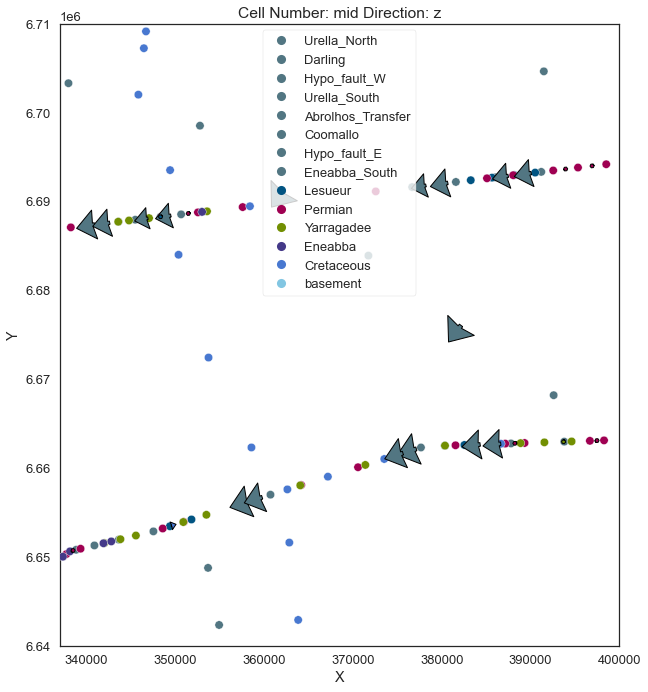

In [64]:
gp.plot_2d(geo_model, direction=['z'])

In [19]:
geo_model.set_topography(source='random')

[-2800.  1000.]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 3.37315000e+05,  6.64035000e+06, -1.79050000e+04],
       [ 3.37315000e+05,  6.64035000e+06, -1.77150000e+04],
       [ 3.37315000e+05,  6.64035000e+06, -1.75250000e+04],
       ...,
       [ 4.00000000e+05,  6.70858586e+06, -1.03746759e+03],
       [ 4.00000000e+05,  6.70929293e+06, -1.04207917e+03],
       [ 4.00000000e+05,  6.71000000e+06, -9.73756719e+02]])

In [20]:
gp.plot_3d(geo_model)

In [21]:
interp_data = gp.set_interpolator(geo_model,
                                  compile_theano=True,
                                  theano_optimizer='fast_run', gradient=False,
                                  dtype='float32')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float32
Number of faults:  8
Compilation Done!
Kriging values: 
                                          values
range                                   96072.9
$C_o$                               2.19762e+08
drift equations  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [22]:
gp.compute_model(geo_model)

C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=2.54916e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=2.22738e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=2.53199e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=2.58209e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matri


Lithology ids 
  [14.       14.       14.       ... 14.       13.001833 13.      ] 

In [ ]:

gp.plot_2d(geo_model, cell_number=[25])

In [ ]:
gp.plot_2d(geo_model, cell_number=[25], series_n=-1, show_scalar=True)

In [ ]:
gp.plot_2d(geo_model, cell_number=[12], direction=["y"], show_data=True, show_topography=True)

sphinx_gallery_thumbnail_number = 6



In [ ]:
gp.plot_3d(geo_model, show_topography=True)

### Times

#### Fast run

-  1M voxels:

   -  CPU: intel® Core™ i7-7700HQ CPU @ 2.80GHz × 8 15 s ± 1.02 s per
      loop (mean ± std. dev. of 7 runs, 1 loop each)
   -  GPU (4gb) not enough memmory
   -  Ceres 1M voxels 2080 851 ms

-  250k voxels

   -  GPU 1050Ti: 3.11 s ± 11.8 ms per loop (mean ± std. dev. of 7 runs,
      1 loop each)
   -  CPU: intel® Core™ i7-7700HQ CPU @ 2.80GHz × 8 2.27 s ± 47.3 ms
   -  

#### Fast Compile

-  250k voxels

   -  GPU 1050Ti: 3.7 s ± 11.8 ms per loop (mean ± std. dev. of 7 runs,
      1 loop each)
   -  CPU: intel® Core™ i7-7700HQ CPU @ 2.80GHz × 8 14.2 s ± 51.1 ms per
      loop (mean ± std. dev. of 7 runs, 1 loop each)




%%timeit
gp.compute_model(geo_model)



ver = np.load('ver.npy')
sim = np.load('sim.npy')
lith_block = np.load('lith.npy')



In [ ]:
gp.save_model(geo_model)

In [ ]:
import pickle

In [ ]:
an_obj = Model_4


file_to_store = open("stored_object_3.pickle", "wb")
pickle.dump(an_obj, file_to_store)


file_to_store.close()